# k-近傍法
予測したいデータに近いデータを**k個**選んで多数決を取る手法
距離を用いるので標準化が必要

## ライブラリ

`sklearn.neighbors`の`KNeighborsClassifier`（回帰の場合は`KNeighborsRegressor`）を用いる
```python
# 分類
from sklearn.neighbors import KNeighborsClassifier
# 回帰
from sklearn.neighbors import KNeighborsRegressor
```


公式レファレンス

[kneighborsclassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[kneighborsregressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html)

### 分類問題

Parameters:

`n_neighbors int, default=5`: 近傍点の数

`weights{‘uniform’, ‘distance’}`: 近傍点の重み（全ての近傍点を同一視するか，距離に応じて重みづけするか, もしくは自作の重み）

`algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’`: 近傍点の探索アルゴリズム（本講義では"auto"でよい）

`leaf_sizeint, default=30`: "algorithm"で"ball_tree"や"kd_tree"を用いた場合に必要となるパラメータ

`pint, default=2`: ミンコフスキー距離の次数で，p=2はユークリッド距離に対応する（
$
(\sum_{i=1}^{N} {|x-y|}^p)^\frac{1}{p}
$)


`metric, str or callable, default=’minkowski’`:距離の測り方，自分で定義するor ミンコフスキー距離

`metric_paramsdict, default=None`: 上記の`metric`パラメータで自分で定義した関数を用いる場合に，その関数に必要な引数を定義できる．

`n_jobs, int, default=None`: 近傍点探索の並列処理のためにいくつのコアを使用するか．デフォルトでは１コア，-1でall Core

In [1]:
# モデルのインポート
from sklearn.neighbors import KNeighborsClassifier

# データセットのインポート
from sklearn.datasets import make_moons, load_breast_cancer, fetch_california_housing, make_regression

# 今回使うやつ
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# いつものやつ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# データを生成
X, y = make_moons(n_samples=100, noise=0.5, random_state=0)

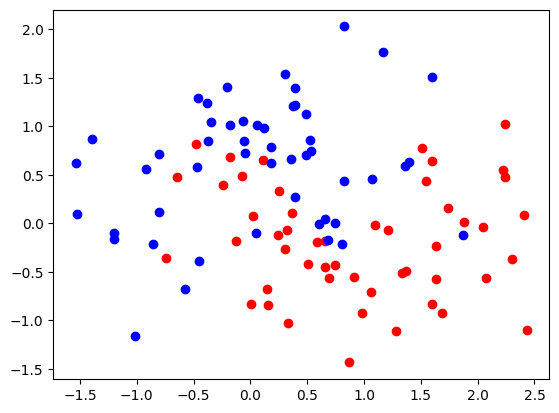

In [14]:
# 描画してみる
plt.scatter(X[y==1, 0], X[y==1, 1], c="r")
plt.scatter(X[y==0, 0], X[y==0, 1], c="b")
plt.show()

In [15]:
# モデルのインスタンス生成
args = {"n_neighbors": 1, "weights": "uniform"}

knn_c = KNeighborsClassifier(n_neighbors=1, weights="uniform") # WRITE ME
# knn_c = KNeighborsClassifier(**args)

# モデルにを習
# WRITE ME
knn_c.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

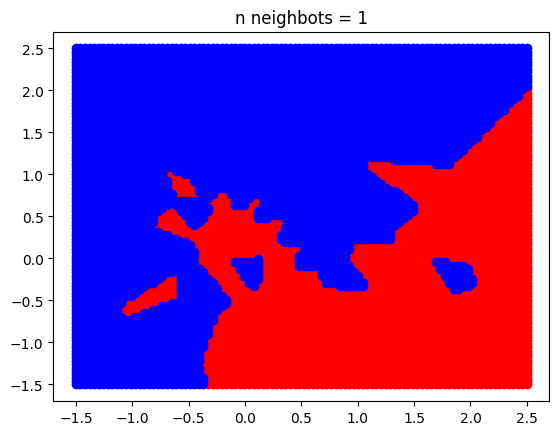

In [16]:
# 決定境界を描画してみる

# 描画に必要なグリッドを用意
x_mesh = np.linspace(-1.5, 2.5, 100)
y_mesh = np.linspace(-1.5, 2.5, 100)
xx, yy = np.meshgrid(x_mesh, y_mesh)
X_pred = np.r_[xx.reshape(1, -1), yy.reshape(1, -1)].T

# グリッドの各点におけるラベルを予測
# predictメソッドで予測してみよう
y_pred_1 = knn_c.predict(X_pred) # WRITE ME

# グリッドを予測値とともに描画
plt.scatter(X_pred[y_pred_1==1, 0], X_pred[y_pred_1==1, 1], c="r")
plt.scatter(X_pred[y_pred_1==0, 0], X_pred[y_pred_1==0, 1], c="b")
plt.title("n neighbots = 1")
plt.show()

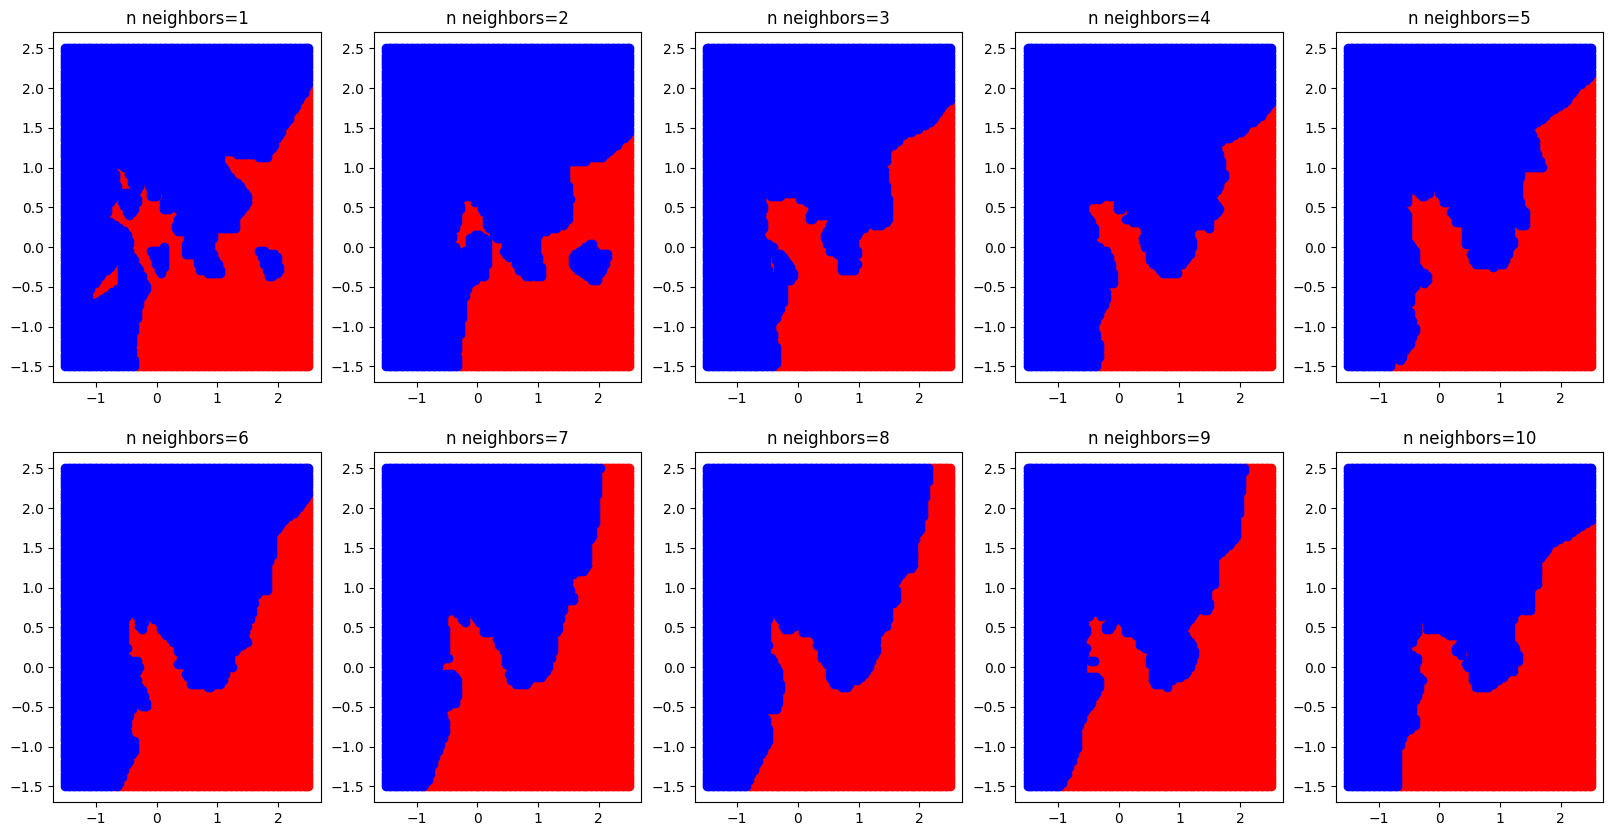

In [17]:
# n_neighbors の数を変えて描画してみる．
num = 10
fig = plt.figure(num, figsize=(20, 10))

for i in range(1, num+1):
    knn_c_i = KNeighborsClassifier(n_neighbors=i, weights="uniform")
    knn_c_i.fit(X, y)
    y_pred_i = knn_c_i.predict(X_pred)

    ax = fig.add_subplot(2, 5, i)
    ax.scatter(X_pred[y_pred_i==1, 0], X_pred[y_pred_i==1, 1], c="r")
    ax.scatter(X_pred[y_pred_i==0, 0], X_pred[y_pred_i==0, 1], c="b")
    ax.set_title(f"n neighbors={i}")
plt.show()

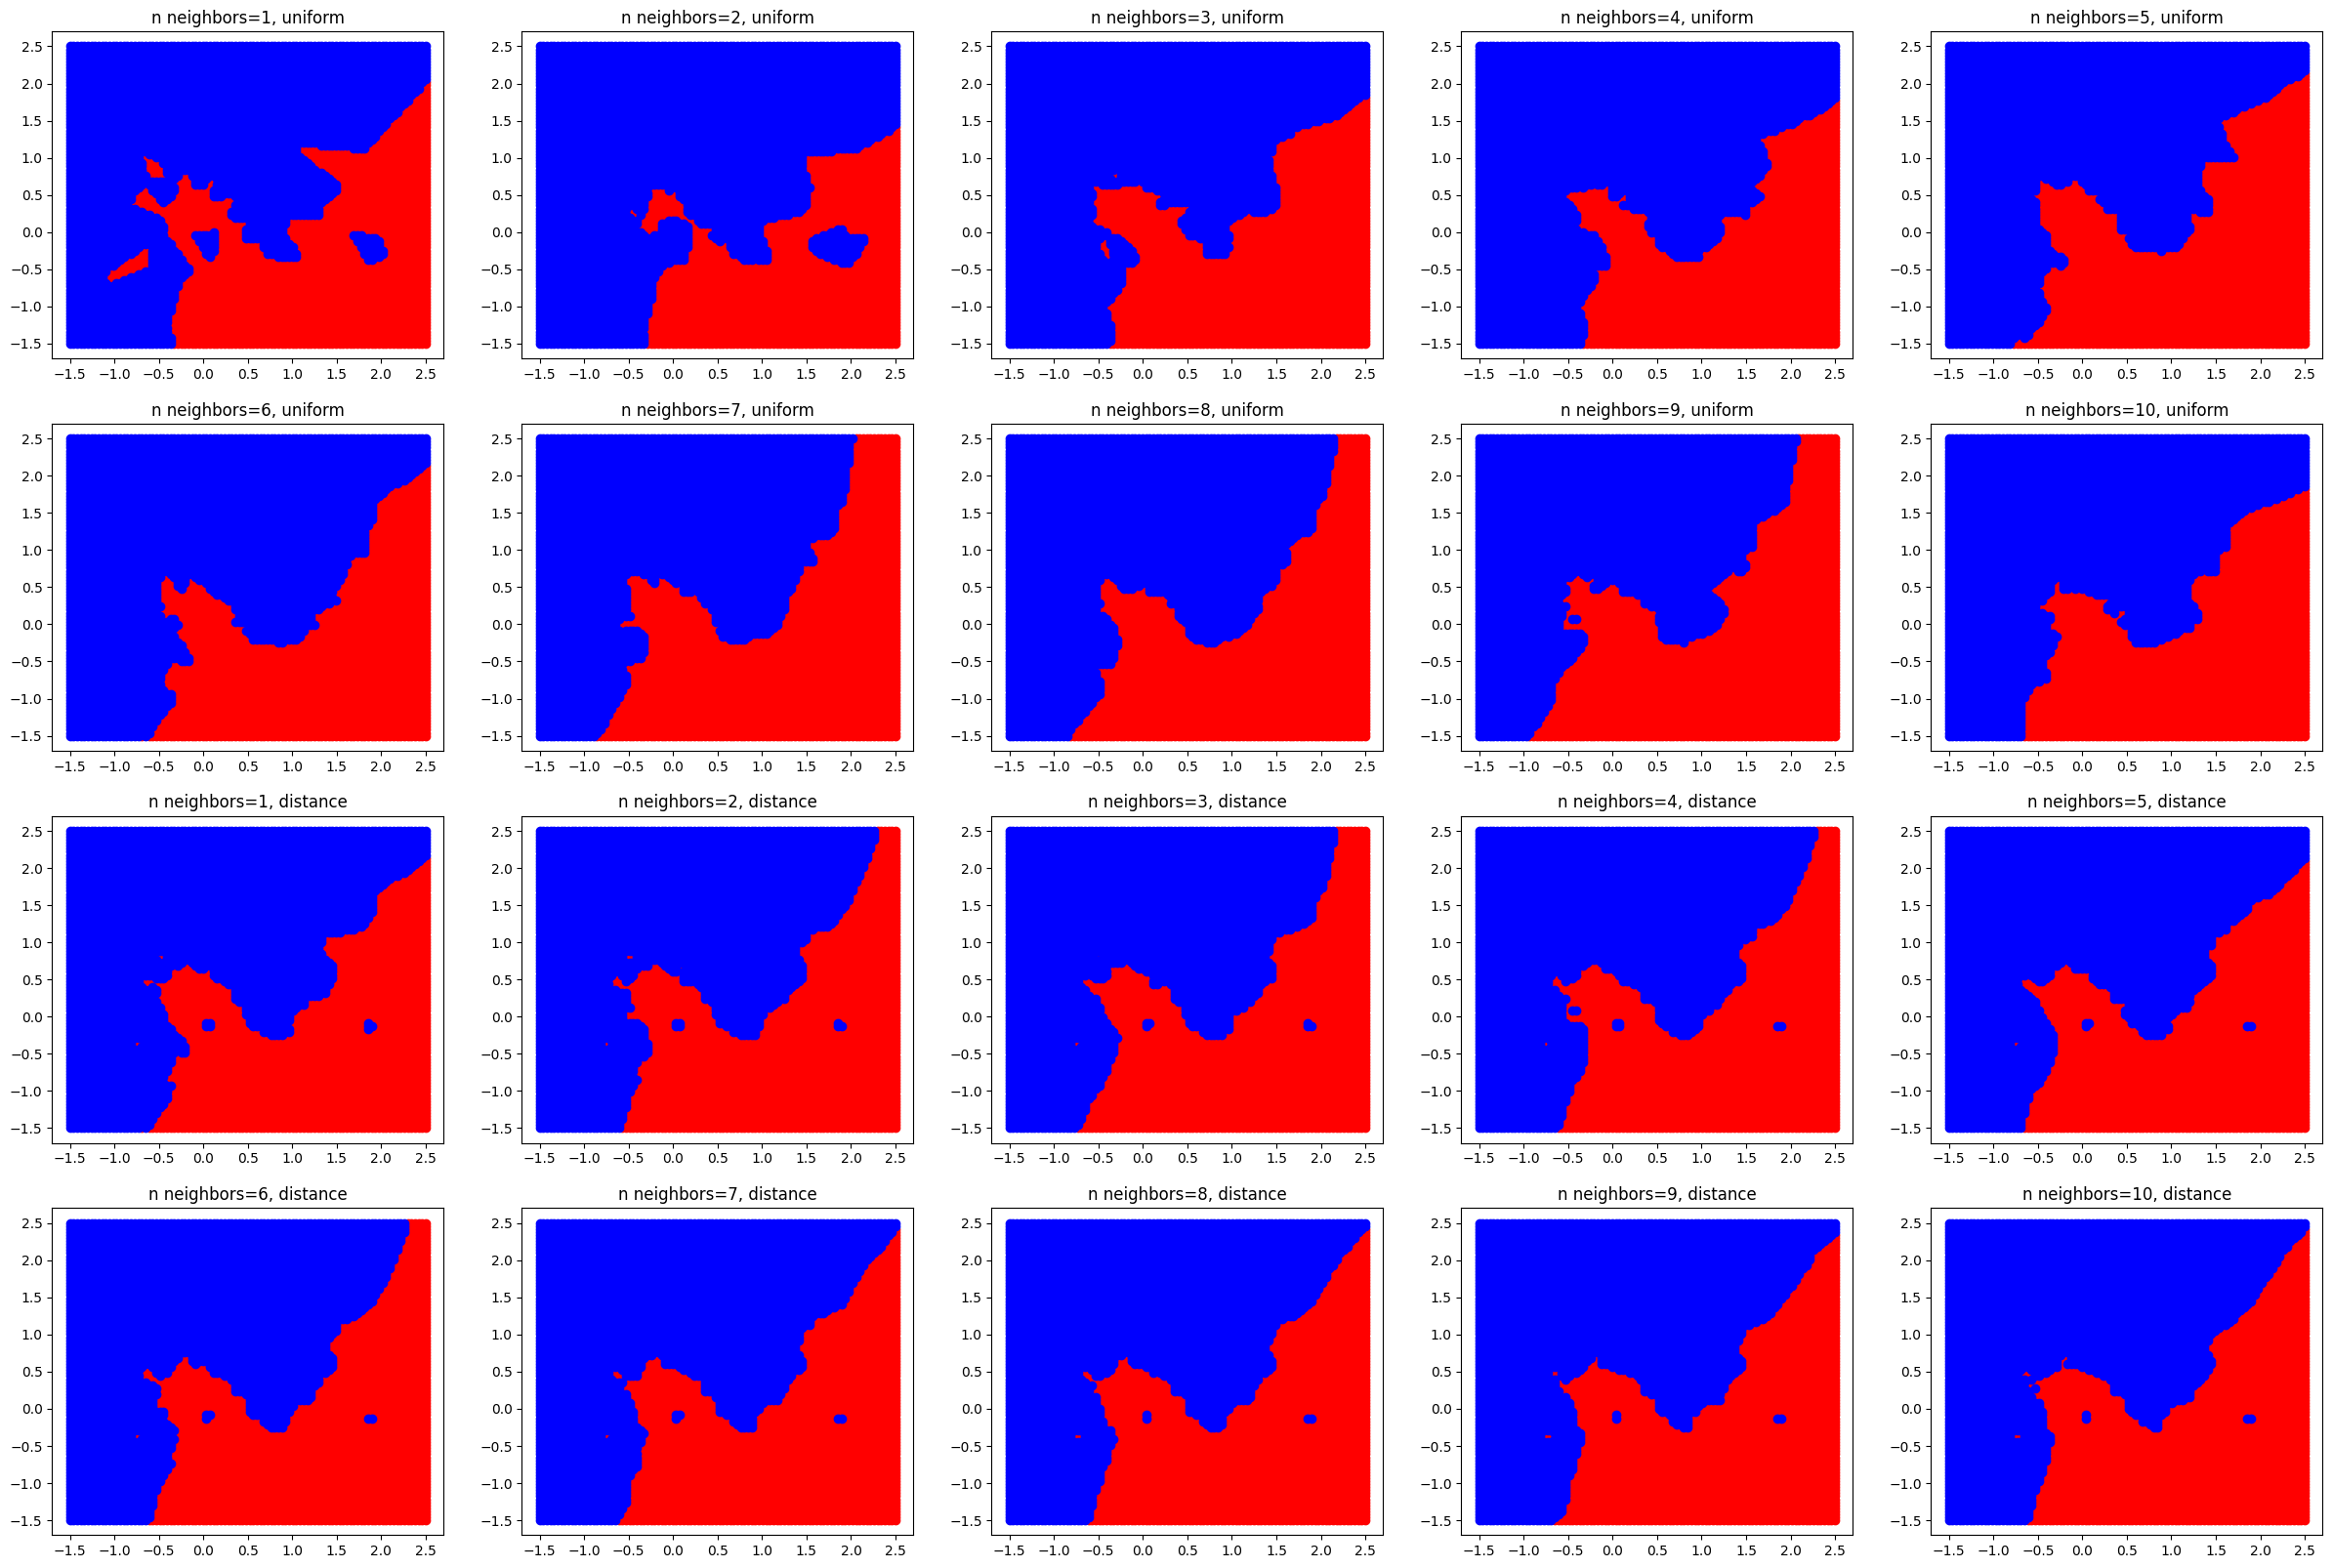

In [18]:
# 重みをdistanceにして描画してみる
num = 20
fig = plt.figure(num, figsize=(30, 20))

for i in range(1, num+1):
    if i >= 11:
        knn_c_i = KNeighborsClassifier(n_neighbors=i-5, weights="distance")
    else:
        knn_c_i = KNeighborsClassifier(n_neighbors=i, weights="uniform")
    knn_c_i.fit(X, y)
    y_pred_i = knn_c_i.predict(X_pred)

    ax = fig.add_subplot(4, 5, i)
    ax.scatter(X_pred[y_pred_i==1, 0], X_pred[y_pred_i==1, 1], c="r")
    ax.scatter(X_pred[y_pred_i==0, 0], X_pred[y_pred_i==0, 1], c="b")
    if i >= 11:
        ax.set_title(f"n neighbors={i-10}, distance")
    else:
        ax.set_title(f"n neighbors={i}, uniform")

plt.show()

In [32]:
# cancer データセットを用いて実装しよう

# データを定義
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# データを分割
# WRITE ME
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# データを標準化
# sscaler インスタンスを生成
sscaler = StandardScaler() # WRITE ME

# sscaler インスタンスにデータを入力して平均と標準偏差を学習
sscaler.fit(X_train) # WRITE ME

# 訓練データとテストデータをそれぞれ変換
X_train = sscaler.transform(X_train) #WRITE ME
X_test = sscaler.transform(X_test) #WRITE ME

# knnインスタンスを生成
# n_neighborsは好きな数字で良い
knn = KNeighborsClassifier(n_neighbors=10, weights="uniform") #WRITE ME

# knnインスタンスを学習
knn.fit(X_train, y_train)

# 精度を見てみる
print("訓練スコア:",knn.score(X_train, y_train))
print("テストスコア:",knn.score(X_test, y_test))

訓練スコア: 0.9673366834170855
テストスコア: 0.9590643274853801


### 回帰問題

回帰問題は，近傍点の平均値を返す．


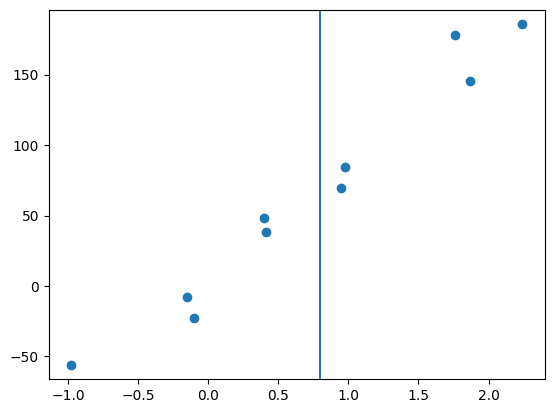

In [9]:
# モデルのインポート
from sklearn.neighbors import KNeighborsRegressor

# データセットのインポート
from sklearn.datasets import fetch_california_housing, make_regression

X, y= make_regression(n_samples=10, n_features=1, noise=15, random_state=0)
plt.scatter(X, y)
plt.plot(np.array([0.8, 0.8]), np.array([-100, 200]))
plt.ylim(y.min()-10, y.max()+10)
plt.show()

In [10]:
# モデルのインスタンスを生成
knn_r = KNeighborsRegressor(n_neighbors=2) #WRITE ME

# モデルにデータを入れて学習
# WRITE ME
knn_r.fit(X, y)

KNeighborsRegressor(n_neighbors=2)

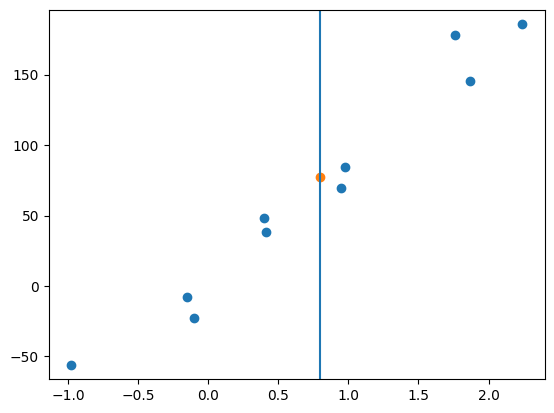

In [11]:
# predictメソッドで予測してみよう
X_pred = np.array([[0.8]])
y_pred = knn_r.predict(X_pred) # WRITE ME

plt.scatter(X, y)
plt.plot(np.array([0.8, 0.8]), np.array([-100, 200]))
plt.scatter(np.array([[0.8]]), y_pred)
plt.ylim(y.min()-10, y.max()+10)
plt.show()

In [34]:
# california housing のデータセットを用いてモデルを作成しよう

# データを定義
california = fetch_california_housing()
X = california.data
y = california.target

# データを分割
# WRITE ME
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# データを標準化

# sscaler インスタンスを生成
sscaler = StandardScaler() # WRITE ME

# sscaler インスタンスにデータを入力して平均と標準偏差を学習
sscaler.fit(X_train) # WRITE ME

# 訓練データとテストデータをそれぞれ変換

X_train = sscaler.transform(X_train) #WRITE ME
X_test = sscaler.transform(X_test) #WRITE ME

# knnインスタンスを生成
# n_neighborsは好きな数字で良い
knn = KNeighborsRegressor(n_neighbors=15) #WRITE ME

# knnインスタンスを学習
knn.fit(X_train, y_train)

# 精度を見てみる

print("訓練スコア:",knn.score(X_train, y_train))
print("テストスコア:",knn.score(X_test, y_test))

訓練スコア: 0.7454102850126958
テストスコア: 0.6909728117644329
